In [2]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
from scipy import stats 

%matplotlib inline

In [130]:
# 5 10 10 20 25 30
origen = {
    'manta' : 0,
    'ambato' : 0,
    'loja' : 0,
    'cuenca' : 0,
    'guayaquil' : 0,
    'quito' : 0,
}

destino = {
    'manta' : 0,
    'ambato' : 0,
    'loja' : 0,
    'cuenca' : 0,
    'guayaquil' : 0,
    'quito' : 0,
}

lugares = ['manta', 'ambato', 'loja', 'cuenca', 'guayaquil', 'quito']

origen_ofrecido = []
destino_ofrecido = []

NUMERO_BUSES = 5
NUMERO_BOLETERIA = 1

TIEMPO_EJECUCION = 7 * 24 * 60 # DIAS * HORAS * MINUTOS


bus1_estado = True
bus2_estado = True
bus3_estado = True
bus4_estado = True
bus5_estado = True

pasajeros_bus1 = 0
pasajeros_bus2 = 0
pasajeros_bus3 = 0
pasajeros_bus4 = 0
pasajeros_bus5 = 0


trabajo_bus1 = {0:0,1:0,2:0,3:0,4:0,5:0,6:0}
trabajo_bus2 = {0:0,1:0,2:0,3:0,4:0,5:0,6:0}
trabajo_bus3 = {0:0,1:0,2:0,3:0,4:0,5:0,6:0}
trabajo_bus4 = {0:0,1:0,2:0,3:0,4:0,5:0,6:0}
trabajo_bus5 = {0:0,1:0,2:0,3:0,4:0,5:0,6:0}


In [131]:
#cada bus se relacionara con uno de estos recorridos definidos
def seleccion_viajes(): #se escogen cuales son los lugares de origen y de retorno predeterminados que se tendran
    global lugares
    global origen_ofrecido
    global destino_ofrecido
    origen_ofrecido = []
    destino_ofrecido = []
    while True:
        origen = np.random.choice([0,1,2,3,4,5], p=[0.05,0.1,0.1,0.2,0.25,0.3]) #manta, ambato, loja, cuenca, guayaquil, quito
        destino = np.random.choice([0,1,2,3,4,5], p=[0.05,0.1,0.1,0.2,0.25,0.3]) #manta, ambato, loja, cuenca, guayaquil, quito
        if(origen!=destino):
            origen_ofrecido.append(lugares[origen])
            destino_ofrecido.append(lugares[destino])
        if(len(origen_ofrecido)==5):
            break
    

def tiempo_compra():
    while True:
        valor = int(np.random.normal(10,2,1)[0])
        if(valor>0):
            break
    return valor

def tiempo_viaje():
    while True:
        valor = int(np.random.normal(6,4,1)[0])
        if(valor>0):
            break
    return valor*60

def genero_bernoulli():
    p =  0.9 # parametro de forma 
    bernoulli = stats.bernoulli(p)
    if (bernoulli==1): # genera aleatorios, donde: 1:masculino y 0:femenino
        return 'masculino'
    else:
        return 'femenino'  

def edad_poisson():
    mu = 35 # parametro de forma 
    poisson = stats.poisson(mu) # Distribución
    return poisson.rvs(1)[0]  # genera aleatorios

def compra_boletos_aleatorio():
    return random.randrange(1,7)
    


tiempo de viaje ida y vuelta del bus 1 es: 360
tiempo de viaje ida y vuelta del bus 2 es: 1200
tiempo de viaje ida y vuelta del bus 3 es: 600
tiempo de viaje ida y vuelta del bus 4 es: 840
tiempo de viaje ida y vuelta del bus 5 es: 360
El bus 1 ha regresado y esta esperando 1 hora para partir nuevamente 
El bus 5 ha regresado y esta esperando 1 hora para partir nuevamente 
tiempo de viaje ida y vuelta del bus 1 es: 1200
tiempo de viaje ida y vuelta del bus 5 es: 600
El bus 3 ha regresado y esta esperando 1 hora para partir nuevamente 
tiempo de viaje ida y vuelta del bus 3 es: 1440
El bus 4 ha regresado y esta esperando 1 hora para partir nuevamente 
tiempo de viaje ida y vuelta del bus 4 es: 1560
El bus 5 ha regresado y esta esperando 1 hora para partir nuevamente 
tiempo de viaje ida y vuelta del bus 5 es: 360
El bus 2 ha regresado y esta esperando 1 hora para partir nuevamente 
tiempo de viaje ida y vuelta del bus 2 es: 720
El bus 5 ha regresado y esta esperando 1 hora para partir n

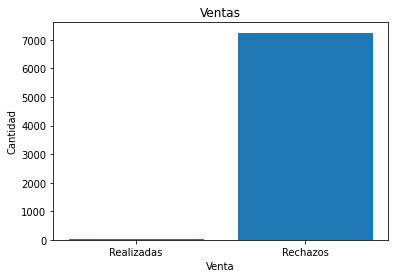

Se ofrece un viaje de loja-guayaquil el cual el bus 1 se encarga de este recorrido
Se ofrece un viaje de cuenca-guayaquil el cual el bus 2 se encarga de este recorrido
Se ofrece un viaje de quito-manta el cual el bus 3 se encarga de este recorrido
Se ofrece un viaje de ambato-quito el cual el bus 4 se encarga de este recorrido
Se ofrece un viaje de cuenca-quito el cual el bus 5 se encarga de este recorrido


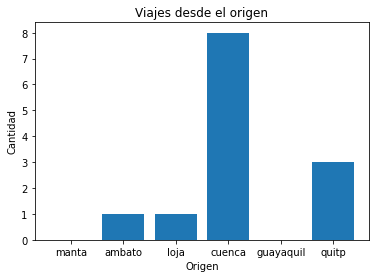

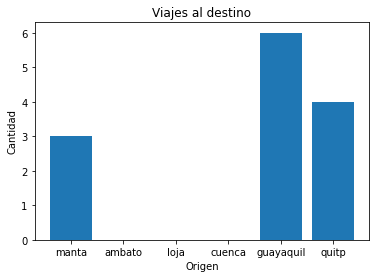

Viajes del 1 bus
{0: 2, 1: 2, 2: 2, 3: 2, 4: 1, 5: 2, 6: 1}
Viajes del 2 bus
{0: 2, 1: 3, 2: 1, 3: 3, 4: 2, 5: 1, 6: 1}
Viajes del 3 bus
{0: 2, 1: 2, 2: 1, 3: 2, 4: 1, 5: 2, 6: 2}
Viajes del 4 bus
{0: 2, 1: 2, 2: 3, 3: 2, 4: 3, 5: 2, 6: 2}
Viajes del 5 bus
{0: 4, 1: 4, 2: 1, 3: 1, 4: 2, 5: 2, 6: 1}


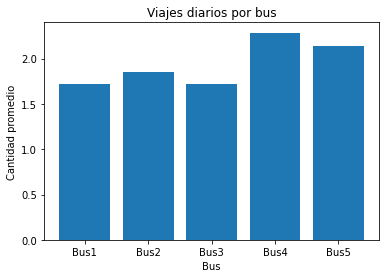

In [132]:
genero = {}
edad = {}
ventas_totales = 0
personas_sin_boletos = 0
def bus_trabajo(env, numero):
    global bus1_estado
    global bus2_estado
    global bus3_estado
    global bus4_estado
    global bus5_estado
    global pasajeros_bus1
    global pasajeros_bus2
    global pasajeros_bus3
    global pasajeros_bus4
    global pasajeros_bus5
    global trabajo_bus1
    global trabajo_bus2
    global trabajo_bus3
    global trabajo_bus4
    global trabajo_bus5
    tiem_viaje = tiempo_viaje()
    tiempo_dia = env.now
    dia = math.trunc(tiempo_dia/1440)
    # print(trabajo_bus1)
    # print(dia)
    # print(trabajo_bus1[dia])
    print('tiempo de viaje ida y vuelta del bus ' + str(numero) + ' es: ' + str(tiem_viaje*2))
    if(numero==1):
        bus1_estado = False # comienza el biaje
        trabajo_bus1[dia] += 1
        yield env.timeout(tiem_viaje) #tiempo de viaje ida
        pasajeros_bus1 = 0
        yield env.timeout(tiem_viaje) #tiempo de vuelta
        bus1_estado=True # Termina el viaje y el bus esta listo para otro nuevo

    elif(numero==2):
        bus2_estado = False # comienza el biaje
        trabajo_bus2[dia] += 1
        yield env.timeout(tiem_viaje) #tiempo de viaje ida
        pasajeros_bus2 = 0
        yield env.timeout(tiem_viaje) #tiempo de vuelta
        bus2_estado=True # Termina el viaje y el bus esta listo para otro nuevo
    elif(numero==3):
        bus3_estado = False # comienza el biaje
        trabajo_bus3[dia] += 1
        yield env.timeout(tiem_viaje) #tiempo de viaje ida
        pasajeros_bus3 = 0
        yield env.timeout(tiem_viaje) #tiempo de vuelta
        bus3_estado=True # Termina el viaje y el bus esta listo para otro nuevo
    elif(numero==4):
        bus4_estado = False # comienza el biaje
        trabajo_bus4[dia] += 1
        yield env.timeout(tiem_viaje) #tiempo de viaje ida
        pasajeros_bus4 = 0
        yield env.timeout(tiem_viaje) #tiempo de vuelta
        bus4_estado=True # Termina el viaje y el bus esta listo para otro nuevo
    elif(numero==5):
        bus5_estado = False # comienza el biaje
        trabajo_bus5[dia] += 1
        yield env.timeout(tiem_viaje) #tiempo de viaje ida
        pasajeros_bus5 = 0
        yield env.timeout(tiem_viaje) #tiempo de vuelta
        bus5_estado=True # Termina el viaje y el bus esta listo para otro nuevo
    print('El bus ' + str(numero) + ' ha regresado y esta esperando 1 hora para partir nuevamente ')
        
class negocio(object):
    def __init__(self, env, num_boleterias):
        self.env = env
        self.boleterias = simpy.Resource(env, num_boleterias)

    def compra_boletos(self,genero,edad):
        global bus1_estado
        global bus2_estado
        global bus3_estado
        global bus4_estado
        global bus5_estado
        global pasajeros_bus1
        global pasajeros_bus2
        global pasajeros_bus3
        global pasajeros_bus4
        global pasajeros_bus5
        global ventas_totales
        global personas_sin_boletos
        global origen
        global destino
        global origen_ofrecido
        global destino_ofrecido
        #cuando se genera el pasagero, entra aca, aqui se debe escoger que viajes
        #va a realziar, y comrpobar que el bus este disponible y que aun hayan boletos
        
        #aqui se escoge que bus, viaje quiere realizar
        seleccion = random.randrange(0,5)
        boletos_comprar = compra_boletos_aleatorio()

        yield env.timeout(tiempo_compra())

        # print(boletos_comprar)
        # print(seleccion)
        # print(bus1_estado)
        # print(pasajeros_bus1)
        # print(pasajeros_bus1<=(40-boletos_comprar))
        if(seleccion==0):
            if(bus1_estado==True and pasajeros_bus1<=(40-boletos_comprar)): # si se puede comprar boletos
                pasajeros_bus1 += boletos_comprar
                ventas_totales += boletos_comprar
                origen[origen_ofrecido[seleccion]] += 1
                destino[destino_ofrecido[seleccion]] += 1
            else:
                personas_sin_boletos += boletos_comprar
        elif(seleccion==1):
            if(bus2_estado==True and pasajeros_bus2<=(40-boletos_comprar)): # si se puede comprar boletos
                pasajeros_bus2 += boletos_comprar
                ventas_totales += boletos_comprar
                origen[origen_ofrecido[seleccion]] += 1
                destino[destino_ofrecido[seleccion]] += 1
            else:
                personas_sin_boletos += boletos_comprar
        elif(seleccion==2):
            if(bus3_estado==True and pasajeros_bus3<=(40-boletos_comprar)): # si se puede comprar boletos
                pasajeros_bus3 += boletos_comprar
                ventas_totales += boletos_comprar
                origen[origen_ofrecido[seleccion]] += 1
                destino[destino_ofrecido[seleccion]] += 1
            else:
                personas_sin_boletos += boletos_comprar
        elif(seleccion==3):
            if(bus4_estado==True and pasajeros_bus4<=(40-boletos_comprar)): # si se puede comprar boletos
                pasajeros_bus4 += boletos_comprar
                ventas_totales += boletos_comprar
                origen[origen_ofrecido[seleccion]] += 1
                destino[destino_ofrecido[seleccion]] += 1
            else:
                personas_sin_boletos += boletos_comprar
        elif(seleccion==4):
            if(bus5_estado==True and pasajeros_bus5<=(40-boletos_comprar)): # si se puede comprar boletos
                pasajeros_bus5 += boletos_comprar
                ventas_totales += boletos_comprar
                origen[origen_ofrecido[seleccion]] += 1
                destino[destino_ofrecido[seleccion]] += 1
            else:
                personas_sin_boletos += boletos_comprar


def llegada_persona(env,neg):
    with neg.boleterias.request() as boleteria:
        yield boleteria

        genero = genero_bernoulli()
        edad_persona = edad_poisson()
    
        yield env.process(neg.compra_boletos(genero,edad_persona))

contador = 0
def ejecutar_simulacion(env, nume_boleterias):
    global bus1_estado
    global bus2_estado
    global bus3_estado
    global bus4_estado
    global bus5_estado

    global contador     

    neg = negocio(env, nume_boleterias)
    while True:
        yield env.timeout(1)
        k = env.now
        # print(k)

        if(k%60==0):
            contador += 1
            # print('-------------')
            # print(env.now)
            if(bus1_estado==True):
                env.process(bus_trabajo(env,1))
            if(bus2_estado==True):
                env.process(bus_trabajo(env,2))
            if(bus3_estado==True):
                env.process(bus_trabajo(env,3))
            if(bus4_estado==True):
                env.process(bus_trabajo(env,4))
            if(bus5_estado==True):
                env.process(bus_trabajo(env,5))
        
        #generar las personas
        env.process(llegada_persona(env,neg))
        


seleccion_viajes()
random.seed(77)

env = simpy.Environment()
env.process(ejecutar_simulacion(env,2))

env.run(until = TIEMPO_EJECUCION)

# print(TIEMPO_EJECUCION)
# print('contador = ' + str(contador))

#Boletos
print('Total de boletos vendidos: ')
print(ventas_totales)
print('Total de compras rechazadas: ')
print(personas_sin_boletos)

plt.bar(range(2), [ventas_totales,personas_sin_boletos], align="center", tick_label=['Realizadas','Rechazos'])
plt.title("Ventas")
plt.xlabel("Venta")
plt.ylabel("Cantidad")
plt.show()

    
#lugares mas visitados
viajes = []
for x in range(5):
    viajes.append(origen_ofrecido[x] + '-' + destino_ofrecido[x])
    print('Se ofrece un viaje de ' + viajes[x] + ' el cual el bus ' +  str(x+1) + ' se encarga de este recorrido')

plt.bar(range(6), [origen['manta'],origen['ambato'],origen['loja'],origen['cuenca'],origen['guayaquil'],origen['quito']], align="center", tick_label=['manta','ambato','loja','cuenca','guayaquil','quitp']) #manta, ambato, loja, cuenca, guayaquil, quito
plt.title("Viajes desde el origen")
plt.xlabel("Origen")
plt.ylabel("Cantidad")
plt.show()

plt.bar(range(6), [destino['manta'],destino['ambato'],destino['loja'],destino['cuenca'],destino['guayaquil'],destino['quito']], align="center", tick_label=['manta','ambato','loja','cuenca','guayaquil','quitp']) #manta, ambato, loja, cuenca, guayaquil, quito
plt.title("Viajes al destino")
plt.xlabel("Origen")
plt.ylabel("Cantidad")
plt.show()




#Viajes por bus
def promedio_viajes(trabajo):
    total = 0
    for x in trabajo:
        total += trabajo[x]
    #print(total)
    # print(len(trabajo))
    total = total/len(trabajo)
    return total

print('Viajes del 1 bus')
print(trabajo_bus1)
print('Viajes del 2 bus')
print(trabajo_bus2)
print('Viajes del 3 bus')
print(trabajo_bus3)
print('Viajes del 4 bus')
print(trabajo_bus4)
print('Viajes del 5 bus')
print(trabajo_bus5)

prom_bus1 = promedio_viajes(trabajo_bus1)
prom_bus2 = promedio_viajes(trabajo_bus2)
prom_bus3 = promedio_viajes(trabajo_bus3)
prom_bus4 = promedio_viajes(trabajo_bus4)
prom_bus5 = promedio_viajes(trabajo_bus5)

plt.bar(range(5), [prom_bus1,prom_bus2,prom_bus3,prom_bus4,prom_bus5], align="center", tick_label=['Bus1','Bus2','Bus3','Bus4','Bus5'])
plt.title("Viajes diarios por bus")
plt.xlabel("Bus")
plt.ylabel("Cantidad promedio")
plt.show()


    
